In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pyextremes import EVA

### Preprocess ###

In [110]:
wsgs_file = pd.read_csv(r'C:\Users\chazzers\Desktop\wsgsmax_values_point.csv')
wsgs = wsgs_file['x']

In [113]:
idx = pd.date_range(start='12/01/1980', end ='06/24/2079', freq='D')

splitting the wsgs data into each decade and setting datetime indices to go with them. Then sticking them together and squeezing to get a pandas time series.

In [231]:
idx_dec1 = pd.date_range(start='12/01/1980', end ='10/09/1990', freq='D')
wsgs1 = wsgs[0:3600]
date1_df = pd.DataFrame({'date':idx_dec1})
wsgs1_df = pd.DataFrame(wsgs1)
wsgs1_df['Datetime'] = idx_dec1
wsgs1_df = wsgs1_df.set_index(['Datetime'])
wsgs1_data = (wsgs1_df.squeeze())

In [235]:
idx_dec2 = pd.date_range(start='10/10/1990', end ='08/17/2000', freq='D')
wsgs2 = wsgs[3601:7201]
date2_df = pd.DataFrame({'date':idx_dec2})
wsgs2_df = pd.DataFrame(wsgs2)
wsgs2_df['Datetime'] = idx_dec2
wsgs2_df = wsgs2_df.set_index(['Datetime'])
wsgs2_data = (wsgs2_df.squeeze())

In [238]:
idx_dec3 = pd.date_range(start='08/18/2000', end ='06/26/2010', freq='D')
wsgs3 = wsgs[7202:10802]
date3_df = pd.DataFrame({'date':idx_dec3})
wsgs3_df = pd.DataFrame(wsgs3)
wsgs3_df['Datetime'] = idx_dec3
wsgs3_df = wsgs3_df.set_index(['Datetime'])
wsgs3_data = (wsgs3_df.squeeze())

In [241]:
idx_dec4 = pd.date_range(start='06/27/2010', end ='05/04/2020', freq='D')
wsgs4 = wsgs[10803:14403]
date4_df = pd.DataFrame({'date':idx_dec4})
wsgs4_df = pd.DataFrame(wsgs4)
wsgs4_df['Datetime'] = idx_dec4
wsgs4_df = wsgs4_df.set_index(['Datetime'])
wsgs4_data = (wsgs4_df.squeeze())

In [243]:
idx_dec5= pd.date_range(start='05/05/2020', end ='03/13/2030', freq='D')
wsgs5 = wsgs[14404:18004]
date5_df = pd.DataFrame({'date':idx_dec5})
wsgs5_df = pd.DataFrame(wsgs5)
wsgs5_df['Datetime'] = idx_dec5
wsgs5_df = wsgs5_df.set_index(['Datetime'])
wsgs5_data = (wsgs5_df.squeeze())

In [247]:
idx_dec6= pd.date_range(start='03/14/2030', end ='01/20/2040', freq='D')
wsgs6 = wsgs[18005:21605]
date6_df = pd.DataFrame({'date':idx_dec6})
wsgs6_df = pd.DataFrame(wsgs6)
wsgs6_df['Datetime'] = idx_dec6
wsgs6_df = wsgs6_df.set_index(['Datetime'])
wsgs6_data = (wsgs6_df.squeeze())

In [251]:
idx_dec7= pd.date_range(start='01/21/2040', end ='11/28/2049', freq='D')
wsgs7 = wsgs[21606:25206]
date7_df = pd.DataFrame({'date':idx_dec7})
wsgs7_df = pd.DataFrame(wsgs7)
wsgs7_df['Datetime'] = idx_dec7
wsgs7_df = wsgs7_df.set_index(['Datetime'])
wsgs7_data = (wsgs7_df.squeeze())

In [253]:
idx_dec8= pd.date_range(start='11/29/2049', end ='10/07/2059', freq='D')
wsgs8 = wsgs[25207:28807]
date8_df = pd.DataFrame({'date':idx_dec8})
wsgs8_df = pd.DataFrame(wsgs8)
wsgs8_df['Datetime'] = idx_dec8
wsgs8_df = wsgs8_df.set_index(['Datetime'])
wsgs8_data = (wsgs8_df.squeeze())

In [256]:
idx_dec9= pd.date_range(start='10/08/2059', end ='08/15/2069', freq='D')
wsgs9 = wsgs[28808:32408]
date9_df = pd.DataFrame({'date':idx_dec9})
wsgs9_df = pd.DataFrame(wsgs9)
wsgs9_df['Datetime'] = idx_dec9
wsgs9_df = wsgs9_df.set_index(['Datetime'])
wsgs9_data = (wsgs9_df.squeeze())

In [262]:
idx_dec10= pd.date_range(start='08/16/2069', end ='06/15/2079', freq='D')
wsgs10 = wsgs[32409:36009]
date10_df = pd.DataFrame({'date':idx_dec10})
wsgs10_df = pd.DataFrame(wsgs10)
wsgs10_df['Datetime'] = idx_dec10
wsgs10_df = wsgs10_df.set_index(['Datetime'])
wsgs10_data = (wsgs10_df.squeeze())

In [323]:
wsgs_df = wsgs_df.rename(columns={'x': 'Wind Speed(m/s)'})
wsgs_df

### Model ### 
using Pyextremes

Making a model for all the decades together first

In [329]:
model = EVA(wsgs_data)

In [330]:
model.get_extremes(method="POT",threshold = 21)

In [331]:
model.fit_model()

C:\Users\chazzers\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
C:\Users\chazzers\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\chazzers\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [332]:
summary = model.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=36000,
)

In [333]:
print(summary)

               return value   lower ci   upper ci
return period                                    
50.0              36.311998  34.956244  37.668035
100.0             37.309266  35.720208  38.927741


(<Figure size 768x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ca0b83b448>)

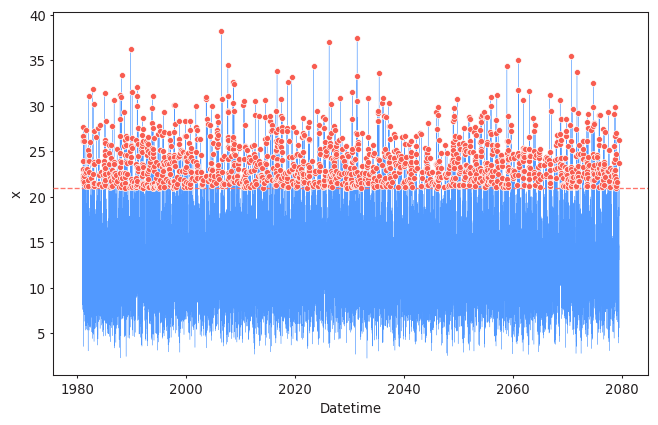

In [334]:
model.plot_extremes()

(<Figure size 768x768 with 4 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x2ca0db97f08>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2ca0dd36348>))

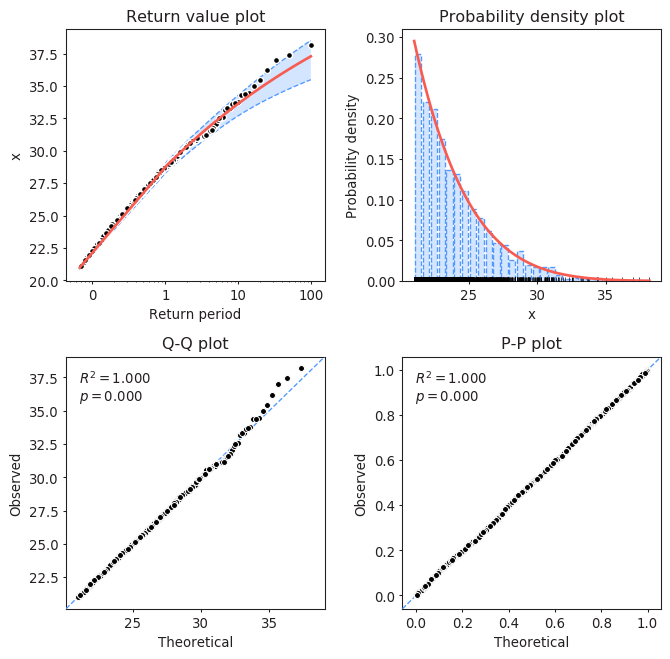

In [335]:
model.plot_diagnostic(alpha=0.95)

Making a model for each decade

In [ ]:
model1 = EVA(wsgs1_data)
model2 = EVA(wsgs2_data)
model3 = EVA(wsgs3_data)
model4 = EVA(wsgs4_data)
model5 = EVA(wsgs5_data)
model6 = EVA(wsgs6_data)
model7 = EVA(wsgs7_data)
model8 = EVA(wsgs8_data)
model9 = EVA(wsgs9_data)
model10 = EVA(wsgs10_data)

Running a POT for each model

In [271]:
#Peak over Threshold
model1.get_extremes(method="POT",threshold = 21)
model2.get_extremes(method="POT",threshold = 21)
model3.get_extremes(method="POT",threshold = 21)
model4.get_extremes(method="POT",threshold = 21)
model5.get_extremes(method="POT",threshold = 21)
model6.get_extremes(method="POT",threshold = 21)
model7.get_extremes(method="POT",threshold = 21)
model8.get_extremes(method="POT",threshold = 21)
model9.get_extremes(method="POT",threshold = 21)
model10.get_extremes(method="POT",threshold = 21)

Fitting the model for each decade

In [272]:
model1.fit_model()
model2.fit_model()
model3.fit_model()
model4.fit_model()
model5.fit_model()
model6.fit_model()
model7.fit_model()
model8.fit_model()
model9.fit_model()
model10.fit_model()

C:\Users\chazzers\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
C:\Users\chazzers\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\chazzers\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Getting return values for 50 and 100 years for each decade

In [297]:
summary1 = model1.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary2 = model2.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary3 = model3.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary4 = model4.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary5 = model5.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary6 = model6.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary7 = model7.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary8 = model8.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary9 = model9.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)
summary10 = model10.get_summary(
    return_period=[50, 100],
    alpha=0.95,
    n_samples=3600,
)

In [298]:
print(summary1)
print(summary2)
print(summary3)
print(summary4)
print(summary5)
print(summary6)
print(summary7)
print(summary8)
print(summary9)
print(summary10)

               return value   lower ci   upper ci
return period                                    
50.0              40.846478  37.877540  43.950884
100.0             42.915735  39.637246  46.343816
               return value   lower ci   upper ci
return period                                    
50.0              32.879608  30.860243  35.385790
100.0             33.304485  31.075675  36.297502
               return value   lower ci   upper ci
return period                                    
50.0              38.644225  32.941276  44.148806
100.0             39.760085  33.229855  46.632153
               return value   lower ci   upper ci
return period                                    
50.0              35.908884  32.320535  40.698180
100.0             36.765854  32.679025  42.730688
               return value   lower ci   upper ci
return period                                    
50.0              39.468575  36.862521  42.371528
100.0             41.396081  38.518041  44.602005


In [285]:
decades = ['1980','1990','2000','2010','2020','2030','2040','2050','2060','2070']
returnvalue_100 = [42.915735,33.304485,39.760085,36.765854,41.396081,43.658625,31.831039,34.528902,35.746846,42.490097]

In [319]:
plt.rcParams["figure.figsize"] = (9,5)

Text(0.5, 0, 'decade(years)')

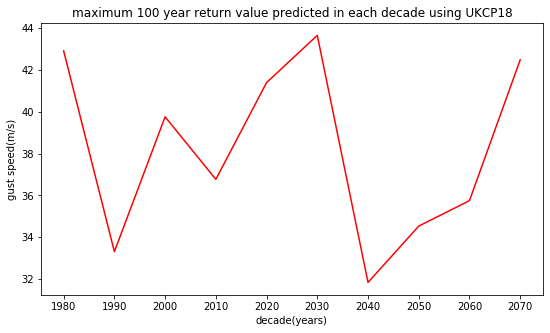

In [321]:
plt.plot(decades,returnvalue_100,color = 'r')
plt.title('maximum 100 year return value predicted in each decade using UKCP18')
plt.ylabel('gust speed(m/s)')
plt.xlabel('decade(years)')